<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D_%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
다중비교만남음

--------------------------------------------------------------------------
### **1. 통계분석**
#### 1-1. ISLR패키지의 Carseats 데이터를 이용하여 Urban 변수에 따른 Sales의 차이가 있는지를 통계적으로 검증하고 결과를 해석하시오 (데이터는 정규성을 만족한다고 가정하고, 유의수준 0.05임)
#### 1-2. iris 데이터에 이용하여 Species에 따른 Sepal.Width 의 차이이가 있는지를 통계적으로 검증하고 해석 하시오 (데이터는 정규성을 만족한다고 가정하고, 유의수준 0.05임)
--------------------------------------------------------------------------


---------------------------**목차**---------------------------
1. **독립표본 t검정**<br>
  1-1. 등분산 검정( Test of Equality of Variance)<br>
  step1. 가설설정<br>
  step2. F 검정통계량 값과 유의확률 계산<br>
  step3. 결론<br>
  step4. 해석<br>
  1-2. 독립표본 t검정<br>
  step1. 가설설정<br>
  step2. T 검정통계량 값과 유의확률 계산<br>
  step3. 결론<br>
  step4. 해석
2.  **일원배치 분산분석** (One-way ANOVA)<br>
2-1. 일원배치 분산분석<br>
  step0. 요인 수준의 밸런스 확인 (범주형 변수 클래스 확인)<br>
  step1. 가설설정<br>
  step2. F 검정통계량 값과 유의확률 계산<br>
  step3. 결론<br>
  step4. 해석<br>
2-2. 다중비교(ducan방법 사용)<br>


- 데이터 로드 및 간단 구조 확인

In [1]:
install.packages("ISLR") ; library(ISLR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
df<-Carseats 

In [3]:
str(df); summary(df)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

#1. 가설검정(독립표본 t검정)
- 이때, class=Urban
- var=Sales<br>

## 1-1. 등분산검정
1) 가설설정
- 귀무가설(H_0): 도시가 아닌 집단과 도시 집단의 모분산은 동일하다.
- 대립가설(H_A): 두 집단의 모분산은 동일하지 않다.

2) 검정통계량 F값과 유의확률 도출<br>
아래의 결과로부터, 유의수준 0.05하에서 모분산의 동일성 검정을 위한 F 검정통계량 값이 0.9787이고 <br>이때의 피밸루값(유의확률)이 0.91이므로 유의확률=0.05보다 크다. 

3) 결론<br>
그러므로 귀무가설을 기각할 수 없다. 

4)해석<br>
즉, 유의수준 0.05 하에서는 두 집단의 모분산이 동일하다고 할 근거가 충분하다. 

In [4]:
var.test(Sales~Urban, data = Carseats, alternative='two.sided')


	F test to compare two variances

data:  Sales by Urban
F = 0.9787, num df = 117, denom df = 281, p-value = 0.9072
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7276615 1.3423111
sample estimates:
ratio of variances 
         0.9786966 


## 1-2. 독립표본 T검정
1) 가설설정
- 귀무가설(H_0): 도시가 아닌 집단과 도시 집단의 평균 판매량은 동일하다.
- 대립가설(H_A): 두 집단의 평균 판매량은 차이가 있다.

2) 검정통계량 T값과 유의확률 도출<br>
아래의 결과로부터, 유의수준 0.05하에서 T 검정통계량 값이 0.3077이고  <br>이때의 피밸루값(유의확률)이 0.7585이므로 유의수준=0.05보다 크다. 

3) 결론<br>
그러므로 귀무가설을 기각할 수 없다. 

4)해석<br>
즉, 유의수준 0.05 하에서는 도시가 아닌 집단과 도시인 집단의 평균 판매량은 통계적으로 유의한 차이가 있다고 할 수 없다. 

In [5]:
t.test(Sales~Urban, data = Carseats, alternative='two.sided', var.equal=T)


	Two Sample t-test

data:  Sales by Urban
t = 0.30765, df = 398, p-value = 0.7585
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -0.5140440  0.7047797
sample estimates:
 mean in group No mean in group Yes 
         7.563559          7.468191 


# 2. 가설검정

- 데이터 로드 및 요인 수준 밸런스 확인

In [6]:
str(iris); summary(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

- `Class`: Species -> 세개-> 원웨이아노바
- `Var`: Sepal.Width
- 아주 균등함

## 2-1. 일원배치 분산분석
1) 가설설정
- 귀무가설(H_0): 세 종류의 종의 꽃받임 너비의 평균은 모두 같다. (종 별로 꽃받임 평균에는 차이가 없다.) 
- 대립가설(H_A): not H_0 즉 모두 같지는 않다.<br>

2) 검정통계량 F값과 유의확률 도출<br>
아래의 F검정 결과로부터, 유의수준 0.05하에서 F검정통계량 값이 49.16이고  <br>이때의 피밸루값(유의확률)은  2e-16보다 작다. 

3) 결론<br>
유의확률의 값이 유의수준=0.05보다 작으므로, 유의수준=0.05하에서는 귀무가설을 기각할 수 있다. 

4)해석<br>
즉, 유의수준 0.05 하에서는 종의 종류에 따라 꽃받임의 너비가 통계적으로 매우 유의한 차이가 있다고 결론지을 근거가 충분하다. <br>어느 집단 사이에 실제로 꽃받임의 모평균에 차이가 있는지 검정하기 위해 다중비교를 해야한다.

In [7]:
summary(aov(Sepal.Width~Species , iris))

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

##2-2. 일원배치 분산분석- 다중비교
- `LSD검정(최소 유의차 이용), Tukey의 표준화 검정법, Scheffe, Dunnett, Ducan등의 방법이 있음
- Ducan의 다중비교방법이 가장 일반적으로 사용

In [10]:
install.packages("agricolae") #듀칸테스트
library(agricolae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’, ‘klaR’, ‘AlgDesign’




In [14]:
out <- duncan.test(aov(Sepal.Width~Species , iris), "Species",  alpha = 0.05, main="Sepal.Width. Dealt with different Species", console = TRUE)


Study: Sepal.Width. Dealt with different Species

Duncan's new multiple range test
for Sepal.Width 

Mean Square Error:  0.1153878 

Species,  means

           Sepal.Width       std  r Min Max
setosa           3.428 0.3790644 50 2.3 4.4
versicolor       2.770 0.3137983 50 2.0 3.4
virginica        2.974 0.3224966 50 2.2 3.8

Alpha: 0.05 ; DF Error: 147 

Critical Range
        2         3 
0.1342604 0.1413141 

Means with the same letter are not significantly different.

           Sepal.Width groups
setosa           3.428      a
virginica        2.974      b
versicolor       2.770      c


1. setosa는 a 그룹, virginica는 b그룹, versicolor는 c그룹으로 모두 다르게 나타났다.
2. 이는 setosa, virginica, versicolor 세 그룹의 꽃받임 모평균에 모두 차이가 있다는 것을 의미한다.
3. 즉, 꽃받임의 너비는 setosa가 가장 크고, 그 다음 virginica, 마지막으로 versicolor 순으로 결론지을 수 있다.

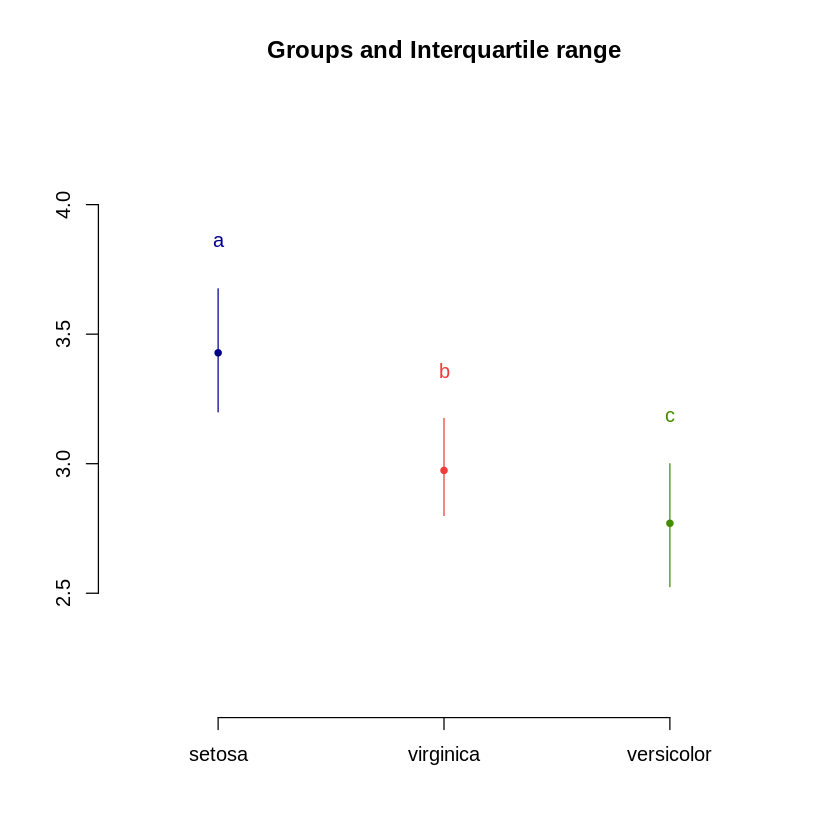

In [15]:
#시각화
plot(out,variation="IQR")